In [1]:
import numpy as np
import pandas as pd

In [2]:


from scipy import stats
import statsmodels.api as sm   # regression

import matplotlib.pyplot as plt


C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
sp500 = pd.read_csv('SP500_DailyIndex-1.csv', parse_dates= ['Date'])

In [4]:
sp500.set_index('Date',inplace=True)

In [5]:
sp500.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [6]:
sp500.columns = ['sp500']

In [7]:
sp500['sp500ret'] = (sp500['sp500'] / sp500['sp500'].shift(1))  -1

In [8]:
sp500.dropna(inplace=True)

In [9]:
ff3 = pd.read_csv('FF3Factors_Daily-1.csv', parse_dates= ['Date'])

In [10]:
ff3.set_index('Date', inplace = True)

In [11]:
df = sp500.join(ff3, how= 'inner')

In [12]:
df['exret'] = df['sp500ret'] - df['RF'] / 100

In [13]:
df1 = df.loc['1965-01-01':'2017-12-31']

In [14]:
cumret = pd.DataFrame((1+df['exret']).resample('M').prod())

In [15]:
cumret.columns = ['monthly_cumret']

In [16]:
cumret.head()

,monthly_cumret
Date,
1960-01-31,0.925220
1960-02-29,1.006350
1960-03-31,0.982703
1960-04-30,0.980507
1960-05-31,1.024057


In [17]:
df['cumprod'] = (1+ df['exret'] / 100)

In [18]:
def cumretfunc(df): 
    v=(df.prod())-1
    return v

In [19]:
# rollingret = pd.rolling_apply(monthlydf, 12, lambda x: np.prod(x))

In [20]:
cumret['rolling12_cumret'] = cumret.rolling(window=12,center=False).apply(lambda x: cumretfunc(x))

In [21]:
# test to see if this is right

cumret['monthly_cumret'].iloc[0:12].prod()

0.9447767117349792

In [22]:
cumret1 = cumret.loc['1965-01-01':'2017-12-31']

### Ex-Ante Volatility

In [23]:
# professor way

delta = 60.0/61.0
cols = ['Ret_stdev']
lst = []
test3 = []

for i in range(len(df1)):
    exret = df1['exret'].iloc[0:i+1]
    counter = np.array(range(0,i+1))[::-1]
    counter2 = (1-delta) * (delta**counter)
    exret_mn = np.dot(counter2, exret)
    test3.append(exret_mn)
    exret_devsq = np.dot(counter2, (exret-exret_mn)**2)
    exret_stdev = (261 * exret_devsq)**0.5
    lst.append(exret_stdev)


df1_stdev = pd.DataFrame(lst, columns = cols, index= df1.index)

In [24]:
df1_stdev = pd.DataFrame(lst, columns = cols, index= df1.index)

In [25]:
df2 = df1.join(df1_stdev, how='inner')

In [63]:
df2.head(5)

,sp500,sp500ret,Mkt-RF,SMB,HML,RF,exret,Ret_stdev
Date,,,,,,,,
1965-01-04,84.230003,-0.006136,-0.45,0.71,-0.08,0.014,-0.006276,0.012768
1965-01-05,84.629997,0.004749,0.49,0.39,-0.10,0.014,0.004609,0.016009
1965-01-06,84.889999,0.003072,0.34,0.19,0.44,0.014,0.002932,0.016998
1965-01-07,85.260002,0.004359,0.40,0.07,0.18,0.014,0.004219,0.018878
1965-01-08,85.370003,0.001290,0.17,0.18,-0.20,0.014,0.001150,0.018826
1965-01-11,85.400002,0.000351,0.06,0.07,0.09,0.014,0.000211,0.018670
1965-01-12,85.610001,0.002459,0.28,0.19,-0.09,0.014,0.002319,0.019005
1965-01-13,85.839996,0.002687,0.28,0.22,-0.02,0.014,0.002547,0.019404
1965-01-14,85.839996,0.000000,0.00,0.04,0.24,0.014,-0.000140,0.019268


In [27]:
df3 = pd.DataFrame((df2['Ret_stdev']).resample('M').last())

In [28]:
newdf = cumret1.join(df3, how = 'inner')

In [30]:
# define a function comparing returns

# def compare(y):
#     if y['lag'] < 0:
#         return 1.0
#     elif y['lag'] > 0:
#         return -1.0
#     else:
#         return 0.0
# newdf = newdf.assign(compare = newdf.apply(compare, axis=1))

### Creating signs and size of the trade, getting Time Series Return

In [31]:
signs = [0.0,]
for i in range(0,len(newdf)-1):
    sign = newdf['rolling12_cumret'][i]
    if sign > 0:
        sign = 1.0
    elif sign < 0:
        sign = -1.0
    else:
        sign = 0.0
    signs.append(sign)


In [32]:
df_signs = pd.DataFrame(signs, columns = ['sign'], index= newdf.index)
newdf = newdf.join(df_signs, how = 'inner')

In [33]:
sizes = [0.0,]
for i in range(0,len(newdf)-1):
    size = 0.4 / newdf['Ret_stdev'][i]
    sizes.append(size)


In [34]:
df_sizes = pd.DataFrame(sizes, columns = ['size'], index= newdf.index)
newdf = newdf.join(df_sizes, how = 'inner')

In [36]:
newdf['TSRet'] = newdf['sign'] * newdf['size'] * (newdf['monthly_cumret'] -1 )

### Key metrics

In [37]:
tsret_mean = newdf['TSRet'].iloc[13:].mean() * 12
tsret_std = newdf['TSRet'].std() * (12**0.5)
tsret_sharpe = (tsret_mean) / tsret_std

print('tsret mean: ',tsret_mean)
print('tsret std: ',tsret_std)
print('tsret sharpe: ',tsret_sharpe)

tsret mean:  0.15133563540508665
tsret std:  0.4172247371897089
tsret sharpe:  0.36271970934521913


### Combine with other data sets

In [38]:
ff3 = pd.read_csv('FF3Factors_Monthly.csv', parse_dates=['Date'])

In [39]:
ff3.head()

,Date,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.30,-2.87,0.22
1,192608,2.64,-1.40,4.19,0.25
2,192609,0.36,-1.32,0.01,0.23
3,192610,-3.24,0.04,0.51,0.32
4,192611,2.53,-0.20,-0.35,0.31


In [40]:
ff3['Date'] = ff3['Date'].apply(lambda x: str(pd.to_datetime(str(x), format= '%Y%m'))[0:7])

In [41]:
ff3.set_index('Date', inplace=True)

In [43]:
newdf.reset_index(inplace=True)
newdf['Date'] = newdf['Date'].apply(lambda x: str(x)[0:7])
newdf.set_index('Date',inplace=True)

In [111]:
newdf.head()

,monthly_cumret,rolling12_cumret,Ret_stdev,lag,sign,size,TSRet,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,,,,,,,,
1965-01-01,1.030272,0.098290,0.021474,NaN,0.0,0.000000,0.000000,3.54,2.68,0.19,0.28,-1.30
1965-02-01,0.995484,0.085532,0.042717,0.098290,1.0,18.627119,-8.412120,0.44,3.48,0.19,0.30,0.28
1965-03-01,0.981852,0.053218,0.042722,0.085532,1.0,9.363984,-16.994077,-1.34,1.78,1.07,0.36,0.09
1965-04-01,1.030991,0.082389,0.042302,0.053218,1.0,9.362796,29.016068,3.11,1.19,0.70,0.31,2.54
1965-05-01,0.989085,0.061207,0.051279,0.082389,1.0,9.455747,-10.320880,-0.77,0.03,-1.61,0.31,0.53


In [45]:
newdf = newdf.join(ff3, how='inner')

In [46]:
mom = pd.read_csv('FF_Momentum_Factor_Monthly.CSV')

In [47]:
mom['Date'] = mom['Date'].apply(lambda x: str(pd.to_datetime(str(x), format= '%Y%m'))[0:7])

In [48]:
mom.set_index('Date', inplace = True)

In [49]:
newdf= newdf.join(mom, how='inner')

In [56]:
newdf.columns

Index(['monthly_cumret', 'rolling12_cumret', 'Ret_stdev', 'lag', 'sign',
       'size', 'TSRet', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Mom   '],
      dtype='object')

In [59]:
newdf['TSRet'] = newdf['TSRet'] *100

### Regressions

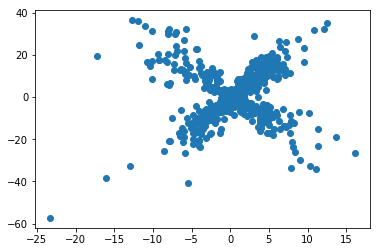

In [60]:
%matplotlib inline

plt.scatter(newdf['Mkt-RF'], newdf['TSRet'])

#### scatter plot suggests that it is hedged both sides, therefore it is market neutral

In [108]:
X = newdf['Mkt-RF']
X1 = sm.add_constant(X)
y = newdf['TSRet']
slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
Wregression = sm.OLS(y,X1).fit()
Wregression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TSRet   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.294
Date:                Sun, 11 Mar 2018   Prob (F-statistic):              0.256
Time:                        14:50:55   Log-Likelihood:                -2484.0
No. Observations:                 636   AIC:                             4972.
Df Residuals:                     634   BIC:                             4981.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1166      0.481      2.323      0.021       0.173       2.061
Mkt-RF         0.1224      0.108      1.138      0.256      -0.089       0.334
==============================================================================
Omnibus:                       18.270   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.714
Skew:                          -0.128   Prob(JB):                     1.76e-08
Kurtosis:                       4.133   Cond. No.                         4.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### alpha = 1.12%, beta = 0.1224, barely correlated with the market

In [62]:
X = newdf[['SMB','HML','Mkt-RF','Mom   ']]
X1 = sm.add_constant(X)
y = newdf['TSRet']
Wregression = sm.OLS(y,X1).fit()
Wregression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TSRet   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     16.59
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           6.18e-13
Time:                        19:28:50   Log-Likelihood:                -2452.9
No. Observations:                 636   AIC:                             4916.
Df Residuals:                     631   BIC:                             4938.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3673      0.475      0.773      0.440      -0.566       1.300
SMB           -0.4636      0.155     -2.990      0.003      -0.768      -0.159
HML            0.5025      0.172      2.914      0.004       0.164       0.841
Mkt-RF         0.4069      0.112      3.626      0.000       0.187       0.627
Mom            0.8157      0.111      7.330      0.000       0.597       1.034
==============================================================================
Omnibus:                       20.133   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.026
Skew:                          -0.027   Prob(JB):                     1.01e-10
Kurtosis:                       4.317   Cond. No.                         5.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Momentum factor has the highest beta, which the strategy was built on (following 12 rolling average returns)

In [89]:
newdf.head(12)

,monthly_cumret,rolling12_cumret,Ret_stdev,lag,sign,size,TSRet,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,,,,,,,,
1965-01-01,1.030272,0.098290,0.021474,NaN,0.0,0.000000,0.000000,3.54,2.68,0.19,0.28,-1.30
1965-02-01,0.995484,0.085532,0.042717,0.098290,1.0,18.627119,-8.412120,0.44,3.48,0.19,0.30,0.28
1965-03-01,0.981852,0.053218,0.042722,0.085532,1.0,9.363984,-16.994077,-1.34,1.78,1.07,0.36,0.09
1965-04-01,1.030991,0.082389,0.042302,0.053218,1.0,9.362796,29.016068,3.11,1.19,0.70,0.31,2.54
1965-05-01,0.989085,0.061207,0.051279,0.082389,1.0,9.455747,-10.320880,-0.77,0.03,-1.61,0.31,0.53
1965-06-01,0.948018,-0.007162,0.097774,0.061207,1.0,7.800451,-40.548609,-5.51,-4.35,0.58,0.35,-3.13
1965-07-01,1.010248,-0.012136,0.093299,-0.007162,-1.0,4.091069,-4.192366,1.43,0.87,2.17,0.31,4.09
1965-08-01,1.019156,0.026198,0.080139,-0.012136,-1.0,4.287289,-8.212882,2.73,2.84,-1.04,0.33,2.57
1965-09-01,1.028765,0.029047,0.074566,0.026198,1.0,4.991331,14.357726,2.86,0.63,-0.14,0.31,3.32


In [70]:
newdf.reset_index(inplace=True)

In [75]:
newdf['Date'] = newdf['Date'].apply(lambda x: x.split('-')[0] + x.split('-')[1])

In [77]:
newdf['Date'] = newdf['Date'].apply(lambda x: pd.to_datetime(x, format= '%Y%m'))

In [78]:
newdf.set_index('Date', inplace=True)

In [98]:
yeardf = pd.DataFrame((1+newdf['TSRet']/100).resample('Y').prod())

In [99]:
yeardf.head()

,TSRet
Date,
1965-12-31,0.571070
1966-12-31,1.197163
1967-12-31,0.725862
1968-12-31,0.406370
1969-12-31,1.481330


In [100]:
yeardf['TSRetAnn'] = yeardf['TSRet'] -1

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'Annual Retrun %')

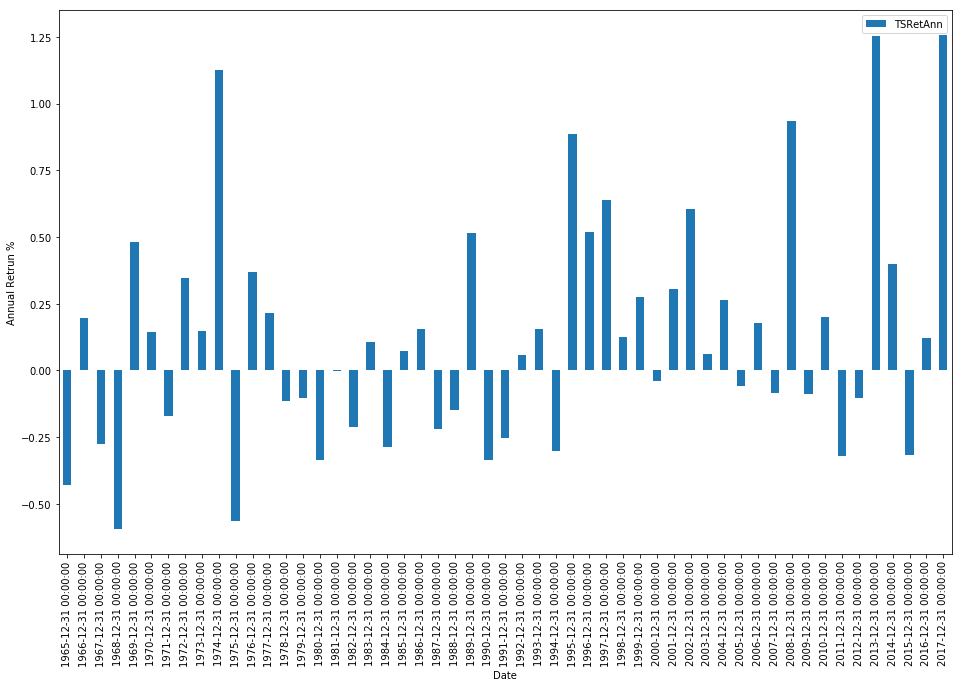

In [101]:
barplot = yeardf.plot(x=yeardf.index, y=['TSRetAnn'], kind='bar', figsize=(16,10))
barplot.set_ylabel('Annual Retrun %')

In [110]:
# variables from above CAPM regression

inforatio= (intercept/100)/std_err
inforatio

0.10377051005524945

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  4.,  1.,  2.,  6.,  7., 17.,
        19., 29., 52., 66., 58., 63., 82., 54., 51., 47., 30., 16.,  8.,
         5.,  4.,  7.,  4.]),
 array([-0.57297373, -0.54176408, -0.51055444, -0.47934479, -0.44813515,
        -0.4169255 , -0.38571586, -0.35450621, -0.32329657, -0.29208692,
        -0.26087728, -0.22966763, -0.19845799, -0.16724834, -0.1360387 ,
        -0.10482905, -0.07361941, -0.04240976, -0.01120012,  0.02000953,
         0.05121917,  0.08242882,  0.11363846,  0.14484811,  0.17605775,
         0.2072674 ,  0.23847704,  0.26968669,  0.30089633,  0.33210598,
         0.36331562]),
 <a list of 30 Patch objects>)

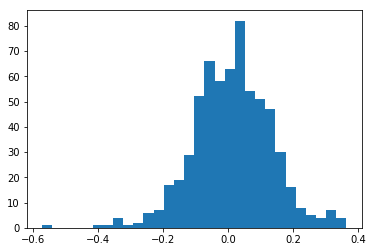

In [149]:
plt.hist (returns, bins = 30)

In [139]:
from scipy.stats import norm

returns = newdf['TSRet'][1:]/100
mu = np.mean(returns)
std = np.std(returns)
VaR = norm.ppf(0.05, mu, std)
VaR

-0.18629075764684888